# Beyond LDI (Liability-Driven Investing)

### Fund Separation Theorem vs. Fund Interacton Theorem

The LDI paradigm suggests that investor welfare should depend on how good each building block is at delivering what is has been designed for. Where in this case the builiding blocks are the PSP (Performance-Seeking Portfolio) and the LHP (Liability-Hedging Portfolio).

Intuitively, the interaction between performance and hedging motives is also expected to play an important role. This suggests that we should look beyond the LDI paradigm .

### Fund Interaction Theorem

The decomposition of investor welfare can be described as follows:

$$ IW = \underbrace{\frac{\lambda^2_{\text{PSP}}}{2\gamma}}_{\text{pure perf contribution}} + \underbrace{\frac{\left(1-\gamma\right)^2}{2\gamma}\sigma^2_L\rho^2_{L,\text{LHP}}}_{\text{pure hedging contribution}} + \underbrace{\left(1-\frac{1}{\gamma}\right)\sigma_L\rho_{L,\text{PSP}}\lambda_{\text{PSP}}}_{\text{cross-contribution perf/hedging}}.$$

$IW$ is the meaningful measure of investor welfare. The meaningful measure is all about investor happiness in terms of final distribution of the funding ratio, which we hope is as high as possible on average and as low as possible in terms of uncertainty. Investor welfare can be composed into three components as shown above. The first component is related to the Sharpe ratio of the PSP. The second component is all abou the correlation of the LHP with the liabilities. For both compononents one and two and investor is happier with these two components as high as possible as long as everything else stays the same. Along with these two somewhat isolated components we have a third one, this component actually includes the Sharpe ratio of the PSP and the correlation between the PSP and the liabilites, investors would also like to make this as high as possible if everything else would stay the same.

### Fund Separation/Interaction in Practice

The main insight from the above discussion of investor welfare is that strong benefits can be expected from improving hedging (resp., performance) characteristics of the PSP (resp., LHP). This is true only if the improvement is associated with an exceedingly large opportunity cost in risk-adjusted performance (resp., hedging properties).

The net impact whether it is positive or negative depends on a tradeoff between two competing effects. The first effect is the following; if you're able to improve the liability-friendliness of the PSP on can allocate more dollar to the PSP for the same risk budget. However, each dollar invested in the PSP may generate a lower performance.

While diversification and hedging are two rather distinct goals, substantial value can be added by aligning PSPs and LHPs.

# Lab Session - Naive Risk Budgeting Strategies between the PSP and GHP

In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2

In [2]:
def bt_mix(r1, r2, allocator, **kwargs):
    '''
    Runs a backtest (simulation) of allocating between two sets of returns 
    r1 and r2 are T x N DataFrames or returns where T is the time step index and N is the number of scenarios.
    allocator is a function that takes two sets of returns and allocator specific parameters, and produces 
    an allocation to the first portfolio (the rest of the money is invested in the GHP) as a T x 1 DataFrame
    Returns a T x N DataFrame of the resulting N portfolio scenarios
    '''
    if not r1.shape == r2.shape:
        raise ValueError("r1 and r2 need to be the same shape")

    weights = allocator(r1, r2, **kwargs)
    if not weights.shape == r1.shape:
        raise ValueError("Allocator returned weights that do not match r1")

    r_mix = weights*r1 + (1-weights)*r2
    return r_mix

In [3]:
def fixedmix_allocator(r1, r2, w1, **kwargs):
    '''
    Produces a time series over T steps of allocation between the PSP and GHP across N scenarios
    PSP and GHP are T x N DataFrames that represent the returns of the PSP and GHP such that:
    each column is a scenario
    each row is the price for a timestep
    Returns a T x N DataFrame of PSP weights
    '''
    return pd.DataFrame(data = w1, index = r1.index, columns = r1.columns)

In [4]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)
price_10 = erk.bond_price(10, 100, 0.05, 12, rates)
price_30 = erk.bond_price(30, 100, 0.05, 12, rates)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)

In [5]:
rets_bonds = erk.bt_mix(rets_10, rets_30, allocator = erk.fixedmix_allocator, w1 = 0.6)
mean_rets_bonds =  rets_bonds.mean(axis = "columns")

In [6]:
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualised Return,Annualised Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.036375,0.003676,0.692782,4.117728,-0.001467,-0.001279,1.688082,0.0


In [7]:
price_eq = erk.gbm_updated(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [8]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator = erk.fixedmix_allocator, w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis = "columns")
erk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualised Return,Annualised Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.062021,0.004705,0.006502,2.95604,-0.002804,-0.002263,6.623847,0.0


In [9]:
summaries = erk.summary_stats(rets_7030b)

In [10]:
summaries.head()

,Annualised Return,Annualised Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.042313,0.100407,0.006988,2.465698,0.043856,0.053277,0.119228,-0.258325
1,0.037932,0.094715,0.065697,2.373779,0.041147,0.046393,0.081393,-0.167447
2,0.072479,0.113536,-0.344478,3.167890,0.050461,0.067942,0.364012,-0.157844
3,0.020023,0.095188,-0.233507,3.276674,0.044672,0.054649,-0.102125,-0.179527
4,0.059489,0.112622,0.011364,2.697532,0.047997,0.058642,0.254708,-0.202964


In [11]:
summaries.mean()

Annualised Return          0.056447
Annualised Vol             0.107981
Skewness                   0.000316
Kurtosis                   2.944513
Cornish-Fisher VaR (5%)    0.046089
Historic CVaR (5%)         0.058316
Sharpe Ratio               0.239791
Max Drawdown              -0.205299
dtype: float64

In [12]:
def terminal_values(rets):
    '''
    Returns the final values of a dollar at the end of the return period for each scenario
    '''
    return (rets+1).prod()

In [13]:
pd.concat([
    erk.terminal_stats(rets_bonds, name = "FI"),
    erk.terminal_stats(rets_eq, name = "Eq"),
    erk.terminal_stats(rets_7030b, name = "70/30")
], axis = "columns")

,FI,Eq,70/30
mean,1.389874,2.016391,1.815828
std,0.107104,0.988597,0.605788
p_breach,NaN,0.046000,0.006000
e_short,NaN,0.102935,0.081304
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/mog/.local/share/virtualenvs/Investment-Management-with-Python-3feIDhEi/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mog/.local/share/virtualenvs/Investment-Management-with-Python-3feIDhEi/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mog/.local/share/virtualenvs/Investment-Management-with-Python-3feIDhEi/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distp

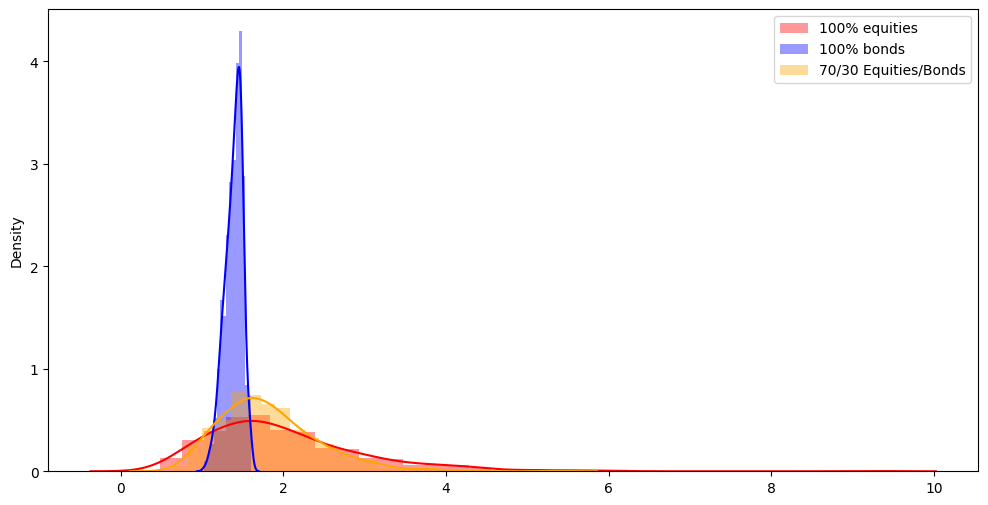

In [15]:
plt.figure(figsize=(12, 6))
sns.distplot(erk.terminal_values(rets_eq), color = "red", label = "100% equities")
sns.distplot(erk.terminal_values(rets_bonds), color = "blue", label = "100% bonds")
sns.distplot(erk.terminal_values(rets_7030b), color = "orange", label = "70/30 Equities/Bonds")
plt.legend();

## Glide Paths for Allocation

In [16]:
def glidepath_allocator(r1, r2, start_glide = 1, end_glide = 0):
    '''
    Simulated a Target-Date_fund style gradual move from r1 to r2
    '''
    n_points = r1.shape[0]
    n_col = r1.shape[1]
    path = pd.Series(data = np.linspace(start_glide, end_glide, num = n_points))
    paths = pd.concat([path]*n_col, axis = 1)
    paths.index = r1.index
    paths.columns = r1.columns
    return paths

In [17]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, allocator = erk.glidepath_allocator, start_glide = 0.80, end_glide = 0.20)

In [18]:
pd.concat([
    erk.terminal_stats(rets_bonds, name = "FI"),
    erk.terminal_stats(rets_eq, name = "Eq"),
    erk.terminal_stats(rets_7030b, name = "70/30"),
    erk.terminal_stats(rets_g8020, name = "Glide 80 to 20")
], axis = "columns")

,FI,Eq,70/30,Glide 80 to 20
mean,1.389874,2.016391,1.815828,1.687011
std,0.107104,0.988597,0.605788,0.435464
p_breach,NaN,0.046000,0.006000,0.002000
e_short,NaN,0.102935,0.081304,0.007767
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN
